# Introduction: Pricing of Homes in King County, WA

![](house.png)


Welcome to my kernel

In this dataset we have to predict the sales price of houses in King County, Seattle. It includes homes sold between May 2014 and May 2015. Before doing anything we should first know about the dataset what it contains what are its features and what is the structure of data.

The dataset cantains 21 house features plus the price, along with 21597 observations.

The description for the 21 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

Now, we know about the overall structure of a dataset . So let's apply some of the steps that we should generally do while applying OLS stats model.


# STEP 1: IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import style
import matplotlib.cm as cm
from matplotlib import *
from scipy.stats import pearsonr
%matplotlib inline

### Exploring the whole dataset

To get a sense for what is in the King County Housing dataset, first I will do some basic exploration of the entire dataset. After cleaning, another round of exploration will help clarify trends in the data specific to midrange housing.

In [2]:
# Import needed packages and read in the data

data = pd.read_csv('kc_house_data.csv')

In [3]:
# View first few rows of the dataset
data.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

# STEP 2: DATA CLEANING AND PREPROCESSING

In this step we check whether data contain null or missing values. What is the size of the data. What is the datatype of each column. What are unique values of categorical variables etc.

In [4]:
# View counts and data types by column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# Check for missing values by column
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Check for duplicate records
print('Number of duplicate records: ', sum(data.duplicated()))

Number of duplicate records:  0


In [7]:
# Check for duplicate IDs
display(data['id'].value_counts().head())

# Count non-unique IDs
id_value_counts = data['id'].value_counts()
num_repeat_ids = len(id_value_counts[id_value_counts > 1])*2 + 1
print('Number of non-unique IDs: ', num_repeat_ids)

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

Number of non-unique IDs:  353


In [8]:
# Inspect a few of the records with duplicate IDs
display(data[data['id'] == 795000620])
display(data[data['id'] == 1825069031])
display(data[data['id'] == 2019200220])
display(data[data['id'] == 7129304540])
display(data[data['id'] == 1781500435])

id        date     price  bedrooms  bathrooms  sqft_living  \
17588  795000620   9/24/2014  115000.0         3        1.0         1080   
17589  795000620  12/15/2014  124000.0         3        1.0         1080   
17590  795000620   3/11/2015  157000.0         3        1.0         1080   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
17588      6250     1.0         0.0   0.0  ...      5        1080   
17589      6250     1.0         0.0   0.0  ...      5        1080   
17590      6250     1.0         NaN   0.0  ...      5        1080   

       sqft_basement yr_built  yr_renovated  zipcode      lat    long  \
17588            0.0     1950           0.0    98168  47.5045 -122.33   
17589            0.0     1950           0.0    98168  47.5045 -122.33   
17590            0.0     1950           NaN    98168  47.5045 -122.33   

       sqft_living15  sqft_lot15  
17588           1070        6250  
17589           1070        6250  
17590           1070        6250  

[3 rows x 21 columns]

id        date     price  bedrooms  bathrooms  sqft_living  \
3946  1825069031   8/14/2014  550000.0         4       1.75         2410   
3947  1825069031  10/16/2014  550000.0         4       1.75         2410   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
3946      8447     2.0         0.0   3.0  ...      8        2060   
3947      8447     2.0         NaN   3.0  ...      8        2060   

      sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
3946          350.0     1936        1980.0    98074  47.6499 -122.088   
3947          350.0     1936        1980.0    98074  47.6499 -122.088   

      sqft_living15  sqft_lot15  
3946           2520       14789  
3947           2520       14789  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
12942  2019200220  9/23/2014  160000.0         3       2.25         1470   
12943  2019200220  2/26/2015  269000.0         3       2.25         1470   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
12942      8682     1.0         0.0   0.0  ...      7        1160   
12943      8682     1.0         0.0   0.0  ...      7        1160   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
12942          310.0     1985           0.0    98003  47.2729 -122.299   
12943          310.0     1985           NaN    98003  47.2729 -122.299   

       sqft_living15  sqft_lot15  
12942           1670        8359  
12943           1670        8359  

[2 rows x 21 columns]

id        date     price  bedrooms  bathrooms  sqft_living  \
15796  7129304540  12/20/2014  133000.0         5        2.0         1430   
15797  7129304540   5/14/2015  440000.0         5        2.0         1430   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
15796      5600     1.5         0.0   0.0  ...      6        1430   
15797      5600     1.5         0.0   0.0  ...      6        1430   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
15796            0.0     1947           NaN    98118  47.5192 -122.266   
15797            0.0     1947           0.0    98118  47.5192 -122.266   

       sqft_living15  sqft_lot15  
15796           1860        5980  
15797           1860        5980  

[2 rows x 21 columns]

id       date     price  bedrooms  bathrooms  sqft_living  \
2500  1781500435  8/20/2014  260000.0         3       1.75         1580   
2501  1781500435  2/25/2015  575000.0         3       1.75         1580   

      sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
2500      7344     1.0         0.0   0.0  ...      7        1580   
2501      7344     1.0         0.0   0.0  ...      7        1580   

      sqft_basement yr_built  yr_renovated  zipcode      lat    long  \
2500            0.0     1911           NaN    98126  47.5256 -122.38   
2501            0.0     1911           0.0    98126  47.5256 -122.38   

      sqft_living15  sqft_lot15  
2500           1580        6207  
2501           1580        6207  

[2 rows x 21 columns]

In [9]:
data.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [10]:
# Check the number of unique values in each column
unique_vals_list = []
for col in data.columns:
    unique_vals_list.append({'column': col, 'unique values': len(data[col].unique())})
pd.DataFrame(unique_vals_list)

column  unique values
0              id          21420
1            date            372
2           price           3622
3        bedrooms             12
4       bathrooms             29
5     sqft_living           1034
6        sqft_lot           9776
7          floors              6
8      waterfront              3
9            view              6
10      condition              5
11          grade             11
12     sqft_above            942
13  sqft_basement            304
14       yr_built            116
15   yr_renovated             71
16        zipcode             70
17            lat           5033
18           long            751
19  sqft_living15            777
20     sqft_lot15           8682

In [11]:
# Define a function to create histograms
def hist_it(data):
    
    """Creates histograms of all numeric columns in a DataFrame"""
    
    data.hist(figsize=(16,14))

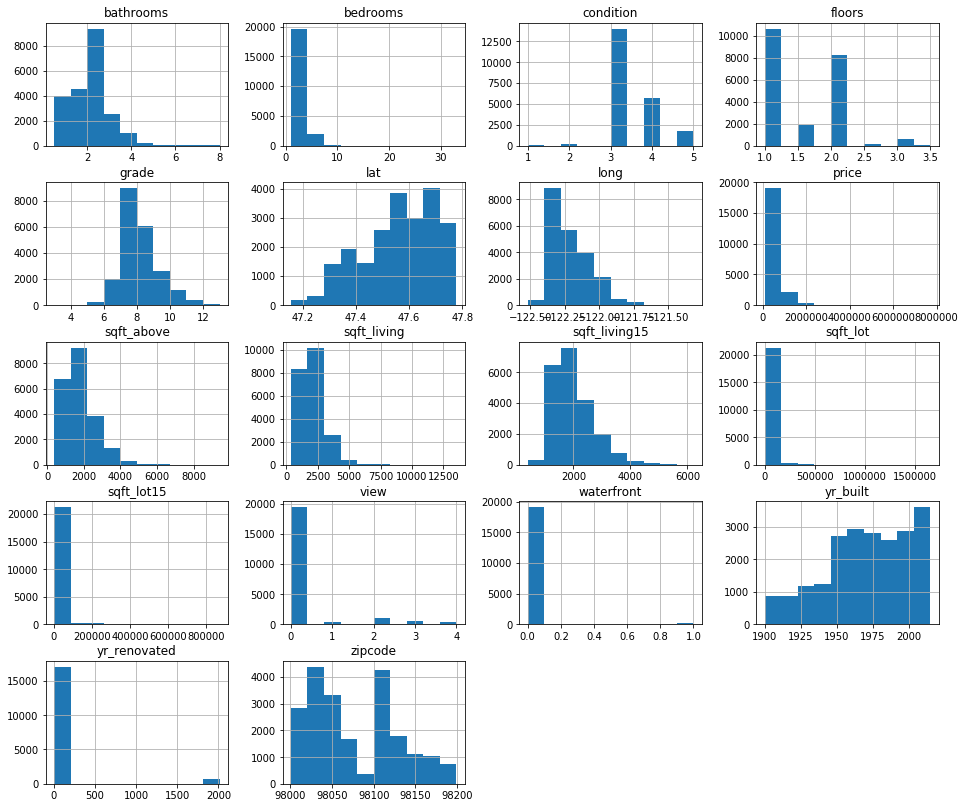

In [12]:
# Create histograms for numerical variables
data_for_hist = data.drop(['id'], axis=1)

hist_it(data_for_hist)

# STEP 3 : FINDING CORRELATION


In this step we check by finding correlation of all the features wrt target variable i.e., price to see whether they are positively correlated or negatively correlated to find if they help in prediction process in model building process or not. But this is also one of the most important step as it also involves domain knowledge of the field of the data means you cannot simply remove the feature from your prediction process just because it is negatively correlated because it may contribute in future prediction for this you should take help of some domain knowledge personnel.

### correlation using Heatmap

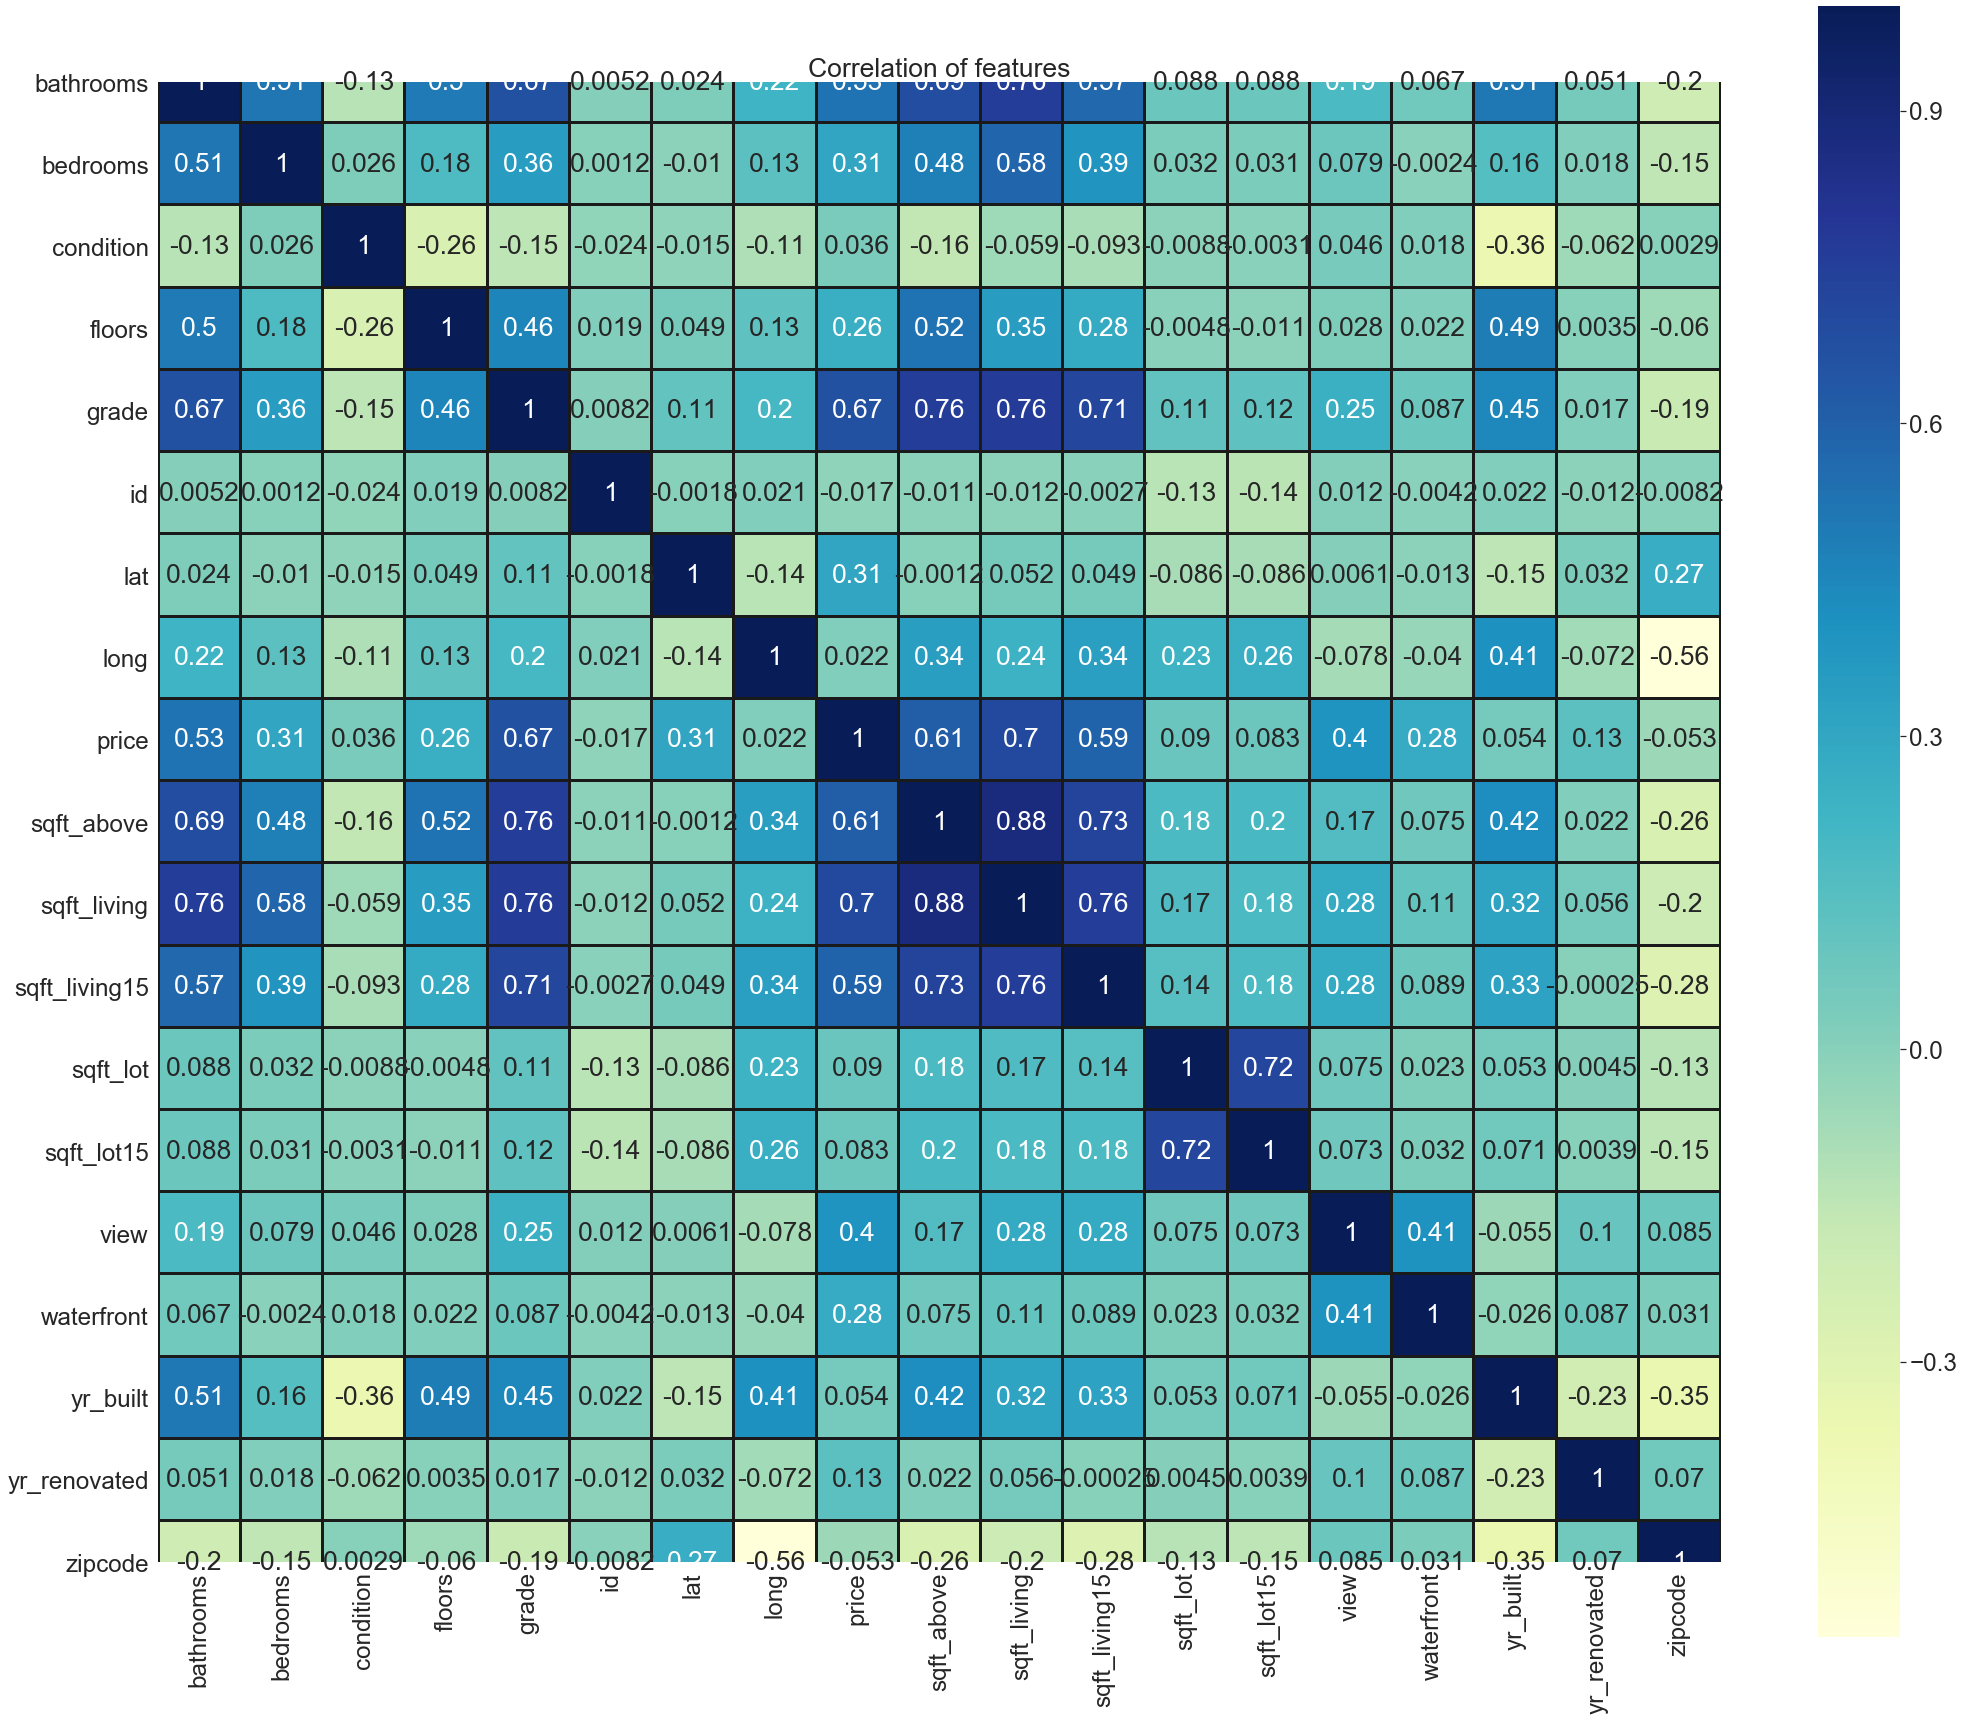

In [13]:
sns.set(font_scale=2.2)
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in data.iteritems():
   if type(colvalue[1]) == str:
        str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = data.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = data[num_list]
f, ax = plt.subplots(figsize=(35, 30))
plt.title('Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=2.0,vmax=1.0, square=True, cmap="YlGnBu", linecolor='k', annot=True)
plt.show()

### Initial cleaning

In [14]:
(data['bedrooms']> 5).value_counts().to_frame()

bedrooms
False     21263
True        334

In [15]:
(data['price']< 1000000).value_counts().to_frame()

price
True   20107
False   1490

### Filter to focus on  homes price under 1 Million?

In [16]:
# Filter the dataset
midrange_homes = data[(data['price'] < 1000000) 
                         & (data['bedrooms'].isin(range(2, 6)))]

# View the first few rows
midrange_homes.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0         NaN   0.0  ...      7        1180            0.0   
1      7242     2.0         0.0   0.0  ...      7        2170          400.0   
2     10000     1.0         0.0   0.0  ...      6         770            0.0   
3      5000     1.0         0.0   0.0  ...      7        1050          910.0   
4      8080     1.0         0.0   0.0  ...      8        1680            0.0   

  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0     1955           0.0    98178  47.5112 -122.257           1340        5650  
1     1951        1991.0    98125  47.7210 -122.319           1690        7639  
2     1933           NaN    98028  47.7379 -122.233           2720        8062  
3     1965           0.0    98136  47.5208 -122.393           1360        5000  
4     1987           0.0    98074  47.6168 -122.045           1800        7503  

[5 rows x 21 columns]

In [17]:
midrange_homes.shape

(19648, 21)

In [18]:
midrange_homes.describe()

id          price      bedrooms     bathrooms   sqft_living  \
count  1.964800e+04   19648.000000  19648.000000  19648.000000  19648.000000   
mean   4.616499e+09  467153.043312      3.303695      2.035920   1951.571610   
std    2.879870e+09  194903.967255      0.786874      0.685435    740.738981   
min    1.200019e+06   78000.000000      2.000000      0.500000    440.000000   
25%    2.141500e+09  315000.000000      3.000000      1.500000   1400.000000   
50%    3.919500e+09  434500.000000      3.000000      2.000000   1840.000000   
75%    7.349650e+09  590000.000000      4.000000      2.500000   2400.000000   
max    9.900000e+09  999999.000000      5.000000      6.000000   7120.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.964800e+04  19648.000000  17483.000000  19592.000000  19648.000000   
mean   1.447698e+04      1.473280      0.002574      0.159351      3.405334   
std    4.002251e+04      0.537018      0.050670      0.612867      0.643668   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.000000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.500000e+03      1.000000      0.000000      0.000000      3.000000   
75%    1.023375e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  19648.000000  19648.000000  19648.000000  16155.000000  19648.000000   
mean       7.515930   1692.828176   1971.167600     70.158279  98078.290768   
std        1.002796    703.910957     28.957641    367.548290     53.283263   
min        4.000000    440.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1170.000000   1952.000000      0.000000  98033.000000   
50%        7.000000   1510.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2080.000000   1996.000000      0.000000  98118.000000   
max       12.000000   5710.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  19648.000000  19648.000000   19648.000000   19648.000000  
mean      47.555399   -122.212337    1910.729794   12359.651822  
std        0.142090      0.142498     600.981751   26292.718315  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.456200   -122.330000    1470.000000    5060.000000  
50%       47.565350   -122.230000    1798.000000    7540.000000  
75%       47.680200   -122.121000    2260.000000    9830.250000  
max       47.777600   -121.315000    4950.000000  871200.000000

In [19]:
# Check for missing values by column
midrange_homes.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2165
view               56
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3493
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Resolve missing values

In [20]:
# View value counts for 'waterfront'
midrange_homes['waterfront'].value_counts()

0.0    17438
1.0       45
Name: waterfront, dtype: int64

In [21]:
# Print medians of homes with and without 'waterfront'
print(midrange_homes[midrange_homes['waterfront'] == 1]['price'].median())
print(midrange_homes[midrange_homes['waterfront'] == 0]['price'].median())

685000.0
435000.0


In [22]:
# Fill NaNs with 0.0 because it is the mode
midrange_homes['waterfront'] = midrange_homes['waterfront'].fillna(0.0)
midrange_homes['waterfront'] = midrange_homes['waterfront'].astype('int64')
midrange_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 21596
Data columns (total 21 columns):
id               19648 non-null int64
date             19648 non-null object
price            19648 non-null float64
bedrooms         19648 non-null int64
bathrooms        19648 non-null float64
sqft_living      19648 non-null int64
sqft_lot         19648 non-null int64
floors           19648 non-null float64
waterfront       19648 non-null int64
view             19592 non-null float64
condition        19648 non-null int64
grade            19648 non-null int64
sqft_above       19648 non-null int64
sqft_basement    19648 non-null object
yr_built         19648 non-null int64
yr_renovated     16155 non-null float64
zipcode          19648 non-null int64
lat              19648 non-null float64
long             19648 non-null float64
sqft_living15    19648 non-null int64
sqft_lot15       19648 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.3+ MB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### view

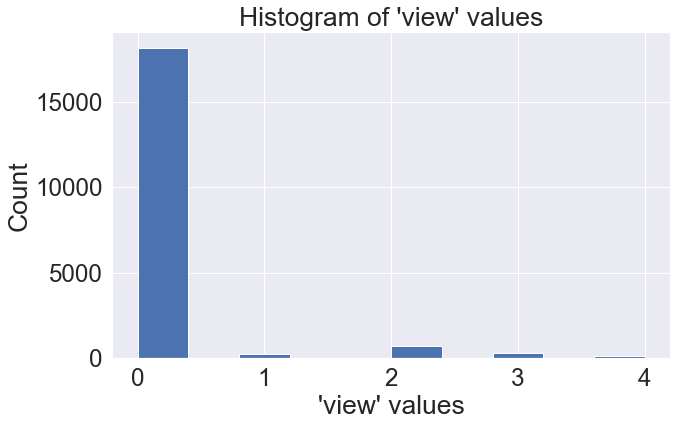

In [23]:
# Create a histogram of 'view' values
plt.figure(figsize=(10,6))
midrange_homes['view'].hist()
plt.title('Histogram of \'view\' values')
plt.xlabel('\'view\' values')
plt.ylabel('Count')
plt.show();

In [24]:
# Fill NaNs with 0.0 and check that missing `view` values are now resolved
midrange_homes['view'] = midrange_homes['view'].fillna(0.0).astype('int64')
midrange_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 21596
Data columns (total 21 columns):
id               19648 non-null int64
date             19648 non-null object
price            19648 non-null float64
bedrooms         19648 non-null int64
bathrooms        19648 non-null float64
sqft_living      19648 non-null int64
sqft_lot         19648 non-null int64
floors           19648 non-null float64
waterfront       19648 non-null int64
view             19648 non-null int64
condition        19648 non-null int64
grade            19648 non-null int64
sqft_above       19648 non-null int64
sqft_basement    19648 non-null object
yr_built         19648 non-null int64
yr_renovated     16155 non-null float64
zipcode          19648 non-null int64
lat              19648 non-null float64
long             19648 non-null float64
sqft_living15    19648 non-null int64
sqft_lot15       19648 non-null int64
dtypes: float64(6), int64(13), object(2)
memory usage: 3.3+ MB


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### yr_renovated

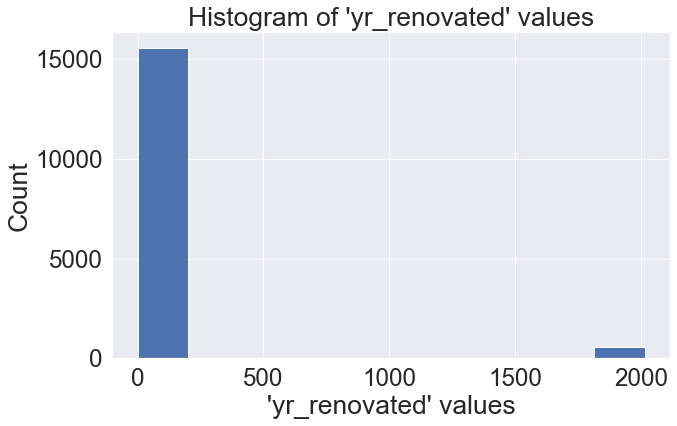

In [25]:
# Create a histogram of 'yr_renovated' values
plt.figure(figsize=(10,6))
midrange_homes['yr_renovated'].hist()
plt.title('Histogram of \'yr_renovated\' values')
plt.xlabel('\'yr_renovated\' values')
plt.ylabel('Count')
plt.show();

In [26]:
midrange_homes['yr_renovated'].value_counts().to_frame()

yr_renovated
0.0            15587
2014.0            62
2013.0            26
2000.0            25
2007.0            23
...              ...
1971.0             1
1944.0             1
1954.0             1
1953.0             1
1946.0             1

[68 rows x 1 columns]

Here we can see in yr_renovated columns alot of years data are misiing it is better to delete coulumn.

### Drop unneeded columns

In [27]:
# Drop unneeded columns
midrange_homes.drop(['id', 'date', 'sqft_above', 'yr_renovated','sqft_basement'], 
                    axis=1, inplace=True)

# Review the remaining columns
midrange_homes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 21596
Data columns (total 16 columns):
price            19648 non-null float64
bedrooms         19648 non-null int64
bathrooms        19648 non-null float64
sqft_living      19648 non-null int64
sqft_lot         19648 non-null int64
floors           19648 non-null float64
waterfront       19648 non-null int64
view             19648 non-null int64
condition        19648 non-null int64
grade            19648 non-null int64
yr_built         19648 non-null int64
zipcode          19648 non-null int64
lat              19648 non-null float64
long             19648 non-null float64
sqft_living15    19648 non-null int64
sqft_lot15       19648 non-null int64
dtypes: float64(5), int64(11)
memory usage: 2.5 MB


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### After cleaning again checking correlation between features.

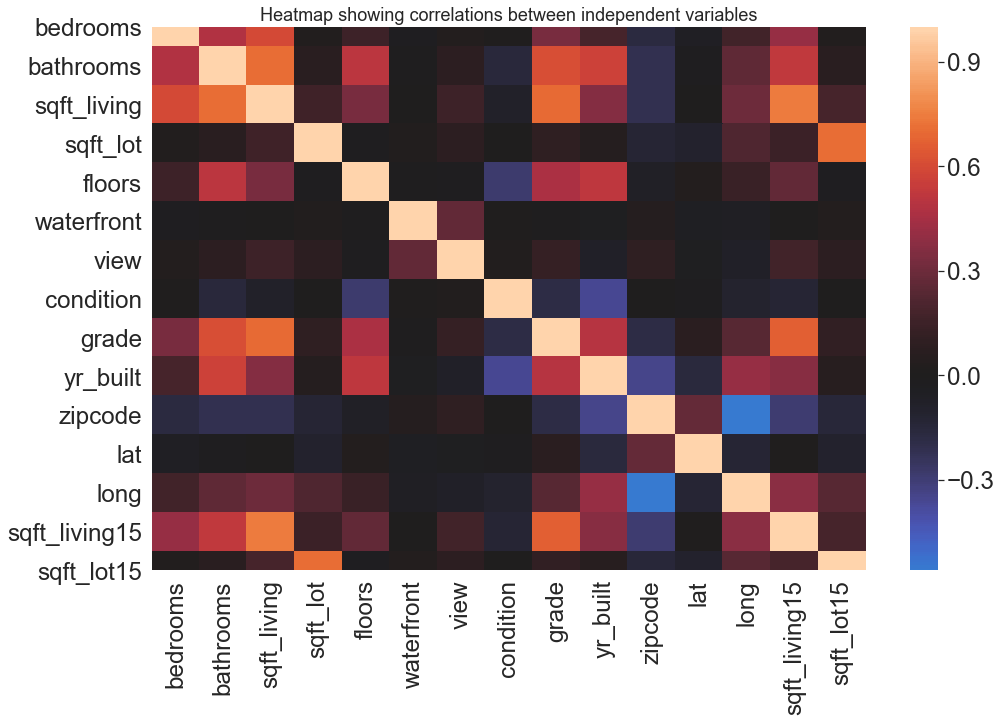

In [28]:
# Create the correlation heatmap
data_for_scatter_matrix = midrange_homes.drop(['price'], axis=1)

plt.figure(figsize=(16,10))
sns.heatmap(data_for_scatter_matrix.corr(), center=0)
plt.title('Heatmap showing correlations between independent variables', 
          fontsize=18)
plt.show();

In [29]:

# Check any number of columns with NaN or missing values 
print(midrange_homes.isnull().any().sum(), ' / ', len(midrange_homes.columns))
# Check any number of data points with NaN
print(midrange_homes.isnull().any(axis=1).sum(), ' / ', len(midrange_homes))

0  /  16
0  /  19648


In [30]:
midrange_homes.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
midrange_homes.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  yr_built  zipcode      lat     long  sqft_living15  \
0     0          3      7      1955    98178  47.5112 -122.257           1340   
1     0          3      7      1951    98125  47.7210 -122.319           1690   
2     0          3      6      1933    98028  47.7379 -122.233           2720   
3     0          5      7      1965    98136  47.5208 -122.393           1360   
4     0          3      8      1987    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

In [32]:
from scipy.stats import pearsonr

In [33]:
features = midrange_homes.iloc[:,1:].columns.tolist()
target = midrange_homes.iloc[:,0].name
features

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [34]:
type(target)

str

In [35]:
(features)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [36]:

# Finding Correlation of price woth other variables to see how many variables are strongly correlated with price
correlations = {}
for f in features:
    data_temp = midrange_homes[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [37]:
# Printing all the correlated features value with respect to price which is target variable
data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

Value
grade vs price          0.618422
sqft_living vs price    0.603381
sqft_living15 vs price  0.550156
lat vs price            0.443727
bathrooms vs price      0.436980
bedrooms vs price       0.285599
floors vs price         0.266876
view vs price           0.213748
sqft_lot vs price       0.096731
sqft_lot15 vs price     0.086158
long vs price           0.081562
yr_built vs price       0.059155
waterfront vs price     0.051141
condition vs price      0.027762
zipcode vs price       -0.017158

# STEP 4 : EDA or DATA VISUALIZATION

This is also a very important step in your prediction process as it help you to get aware you about existing patterns in the data how it is relating to your target variables etc.

### (1)What is the relationship between grade and price?

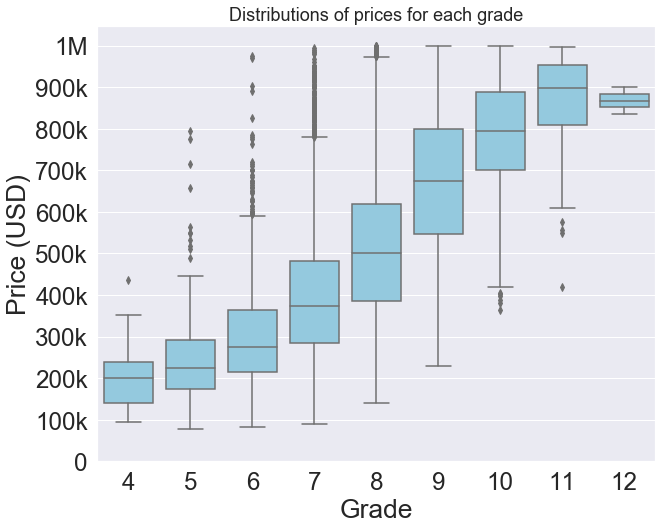

In [38]:
# Create boxplots to compare 'grade' and 'price'
plt.figure(figsize=(10,8))
sns.boxplot(midrange_homes['grade'], midrange_homes['price'], color='skyblue')
plt.title('Distributions of prices for each grade', fontsize=18)
plt.xlabel('Grade')
plt.ylabel('Price (USD)')
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
            ['0', '100k', '200k', '300k', '400k', '500k', '600k',  '700k', '800k', '900k', '1M'])

plt.show();

It looks like there could be substantial differences in price based on the grade of a house. For instance, only the outliers of grade-5 houses fall within the price range of grade-11 houses.

Let's make a direct comparison between the median prices of grade-7 and grade-10 homes:

In [39]:
grade_7_med = midrange_homes[midrange_homes['grade'] == 7]['price'].median()
grade_10_med = midrange_homes[midrange_homes['grade'] == 10]['price'].median()

grade_10_med - grade_7_med

420500.0

There is a huge difference (almost $420500.0) between the median prices of grade-7 and grade-10 homes. Improving the grade of a home by that much is probably outside the reach of most homeowners. What if a homeowner could improve the grade of their home from 7 to 8?

In [40]:
grade_8_med = midrange_homes[midrange_homes['grade'] == 8]['price'].median()

grade_8_med - grade_7_med

125500.0

Based on the boxplots above, we can see that the jump in median price from grade 7 to grade 8 is a big one, but if a homeowner could manage it, it could pay off. The median price of a grade-8 home is $125500.0 higher than the median price of a grade-7 home. Again, this is without considering any other factors, like the size or condition of these homes.

### What is the relationship between bedrooms and price?

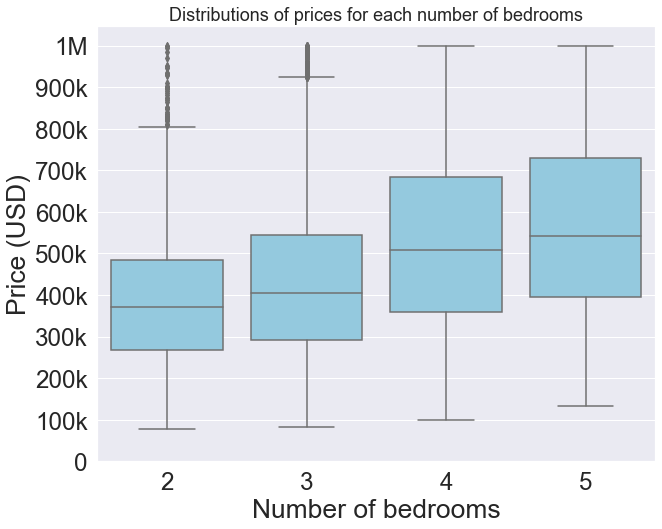

In [41]:
# Create boxplots for 'bedrooms' v. 'price'
plt.figure(figsize=(10,8))
sns.boxplot(midrange_homes['bedrooms'], midrange_homes['price'], color='skyblue')
plt.title('Distributions of prices for each number of bedrooms', fontsize=18)
plt.xlabel('Number of bedrooms')
plt.ylabel('Price (USD)')
plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
            ['0', '100k', '200k', '300k', '400k', '500k', '600k',  '700k', '800k', '900k', '1M'])
plt.show();

In [42]:
# Calculate percent differences in median prices
medians = []

for n in range(2,6):
    medians.append(midrange_homes[midrange_homes['bedrooms'] == n]['price'].median())

percent_differences = []
for m in range(0,len(medians)-1):
    percent_differences.append(round(((medians[m+1] - medians[m]) / medians[m]),2))
    
percent_differences

[0.09, 0.26, 0.07]

The biggest difference in median price is between four and three bedrooms, where there is an increase of 22%

### What is the relationship between floors and price?

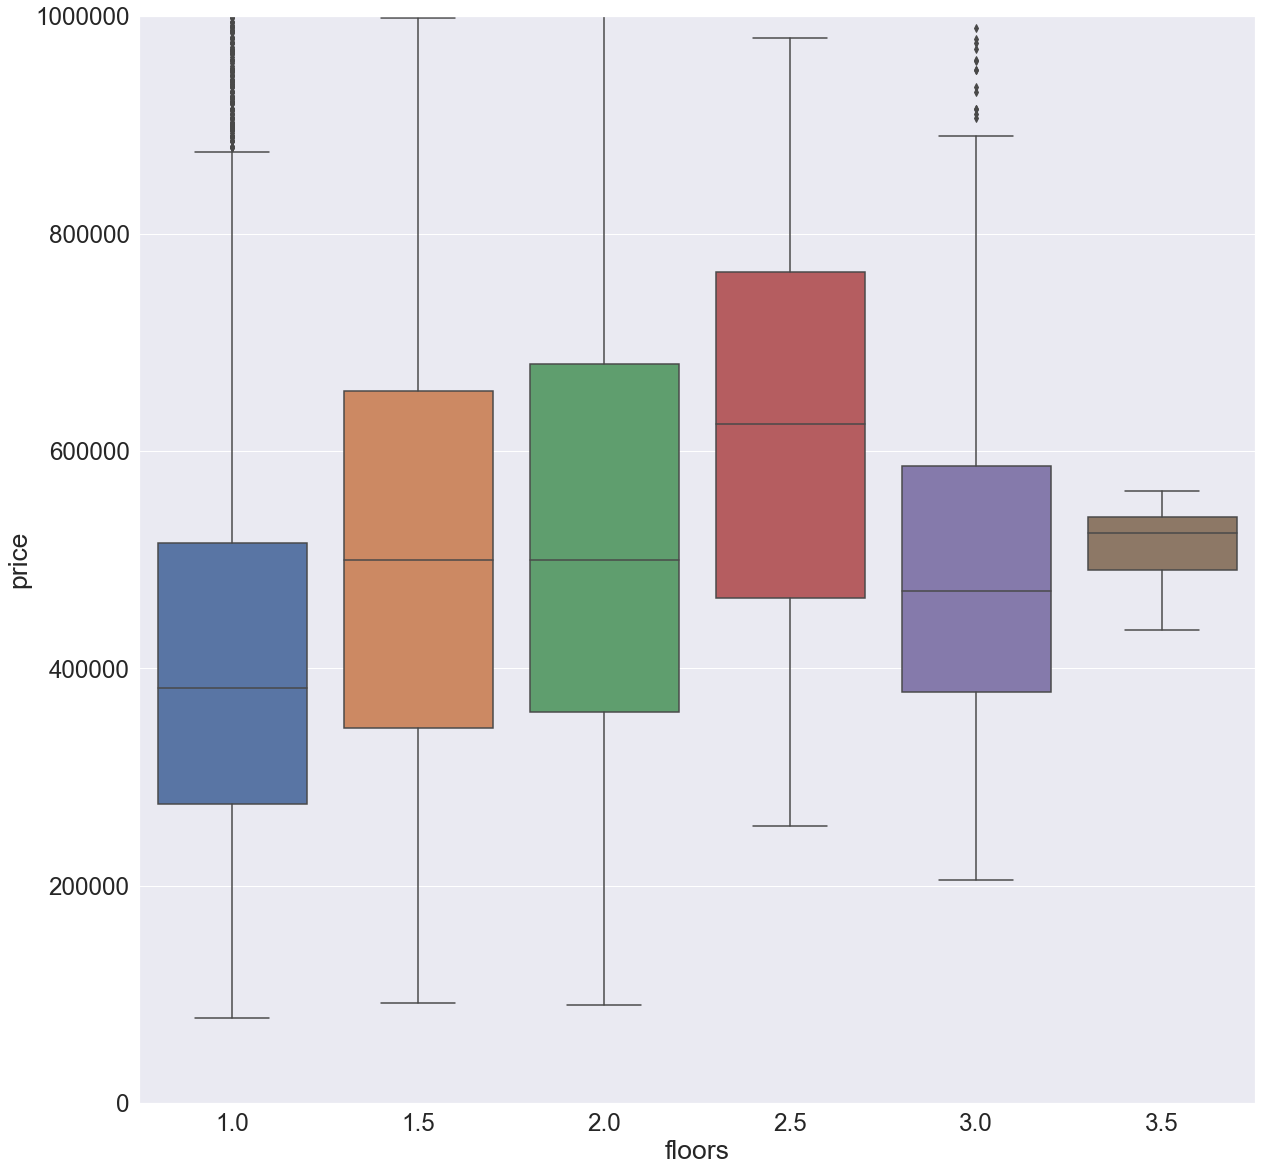

In [43]:

var = 'floors'
data = pd.concat([ midrange_homes['price'],  midrange_homes[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000);

In [44]:
# # Create boxplots for 'floors' v. 'price'
# plt.figure(figsize=(10,8))
# sns.boxplot(midrange_homes['floors'], midrange_homes['price'], color='skyblue')
# plt.title('Distributions of prices for each number of floors', fontsize=18)
# plt.xlabel('Number of floors')
# plt.ylabel('Price (USD)')         
# plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
#             ['0', '100k', '200k', '300k', '400k', '500k', '600k',  '700k', '800k', '900k', '1M'])
# plt.show();

What is the relationship between bathrooms and price?

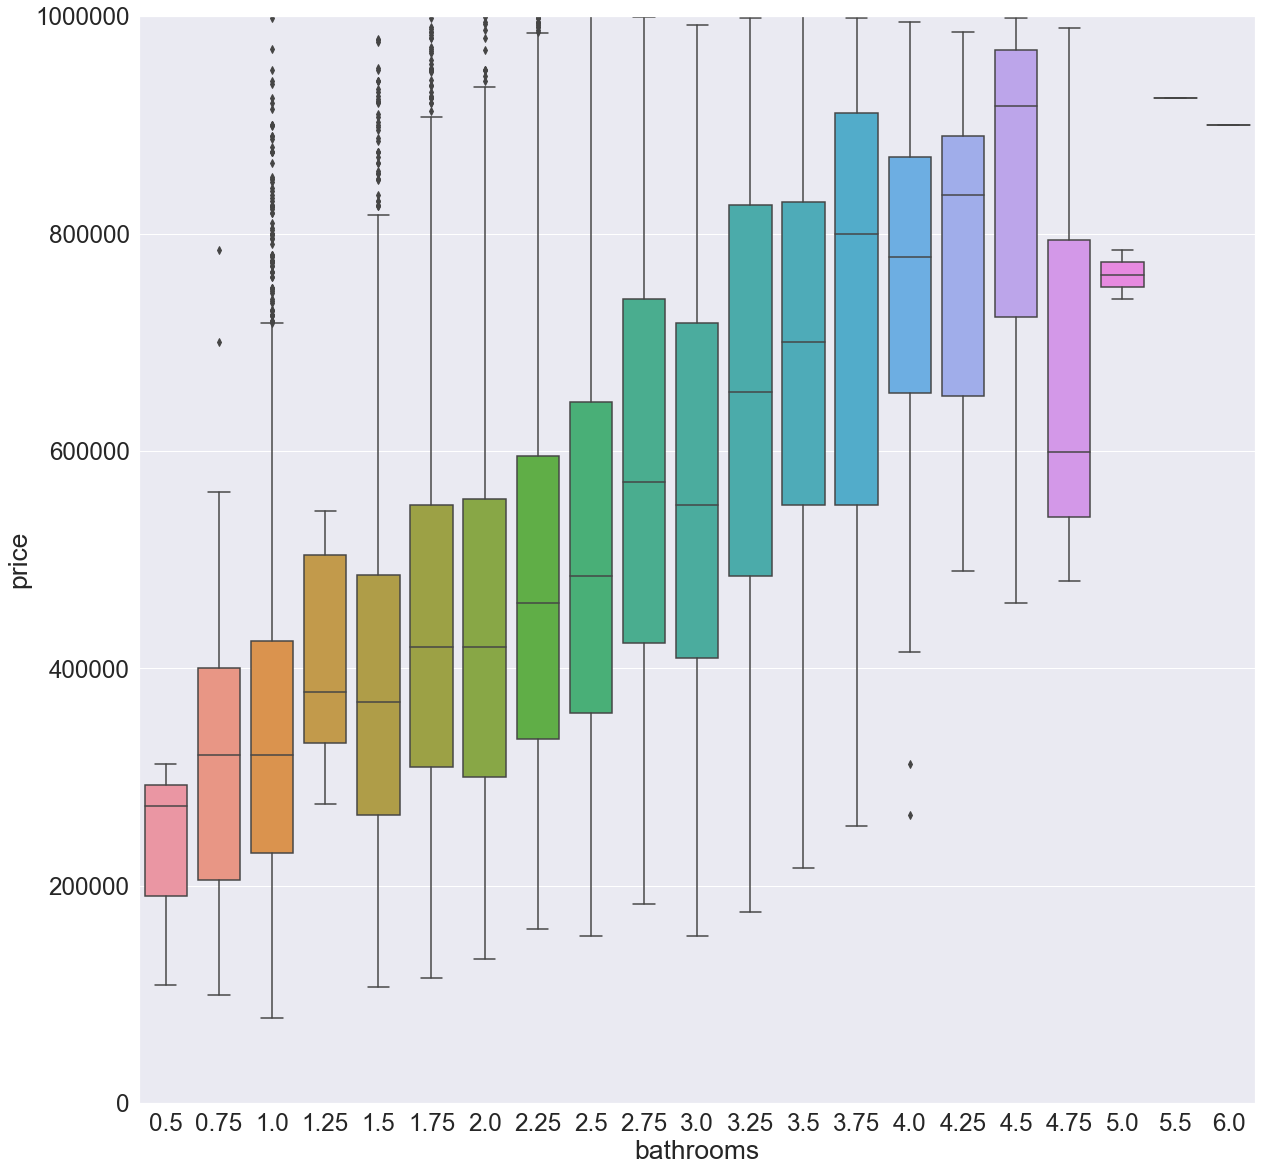

In [45]:
var = 'bathrooms'
data = pd.concat([midrange_homes['price'], midrange_homes[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=1000000);

# Where are the midrange homes in King County?

In [46]:
# Define a function to create map-like scatter plots with color code
def locate_it(data, latitude, longitude, feature):
    
    """Create a scatterplot from lat/long data with color code.
    Parameters:
        data: a DataFrame
        latitude: the name of the column in your DataFrame that contains
            the latitude values. Pass this as a string.
        longitude: the name of the column in your DataFrame that contains
            the longitude values. Pass this as a string.
        feature: the name of the column whose values you want to use as 
            the values for your color code. Pass this as a string.
    Dependencies: matplotlib
    Returns: scatterplot"""
    
    plt.figure(figsize=(16,12))
    cmap = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(data[longitude], data[latitude], 
                     c=data[feature], vmin=min(data[feature]), 
                     vmax=max(data[feature]), alpha=0.5, s=5, cmap=cmap)
    plt.colorbar(sc)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('House {} by location'.format(feature), fontsize=18)
    plt.show();

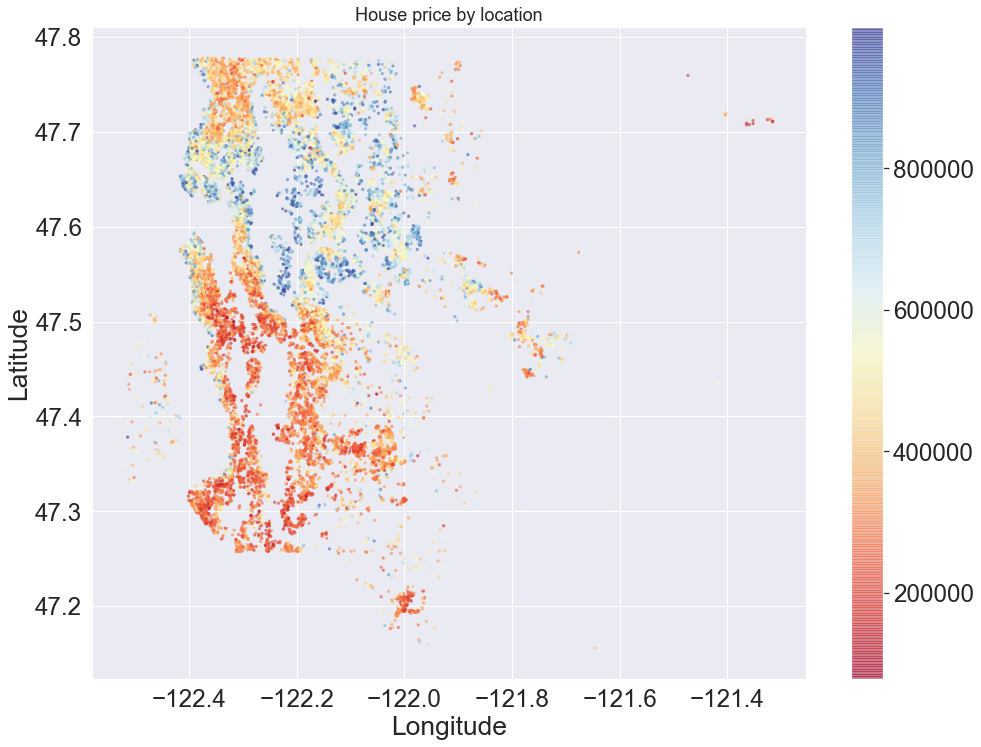

In [47]:
# Call locate_it for price by location
locate_it(midrange_homes, 'lat', 'long', 'price')

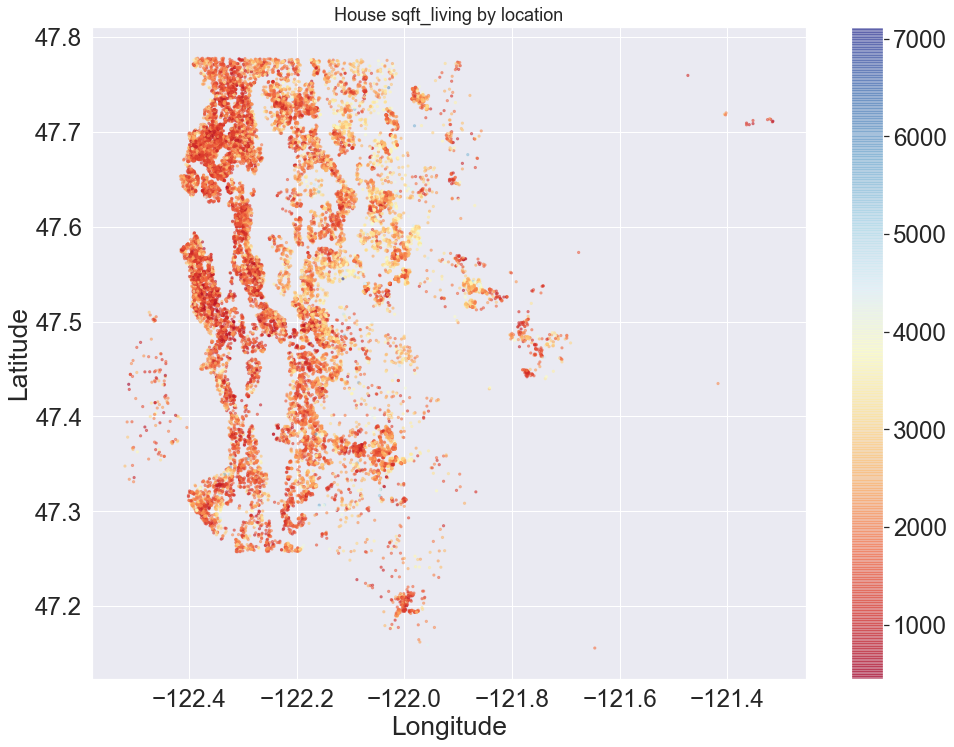

In [48]:
# Call locate_it for sqft_living by location
locate_it(midrange_homes, 'lat', 'long', 'sqft_living')

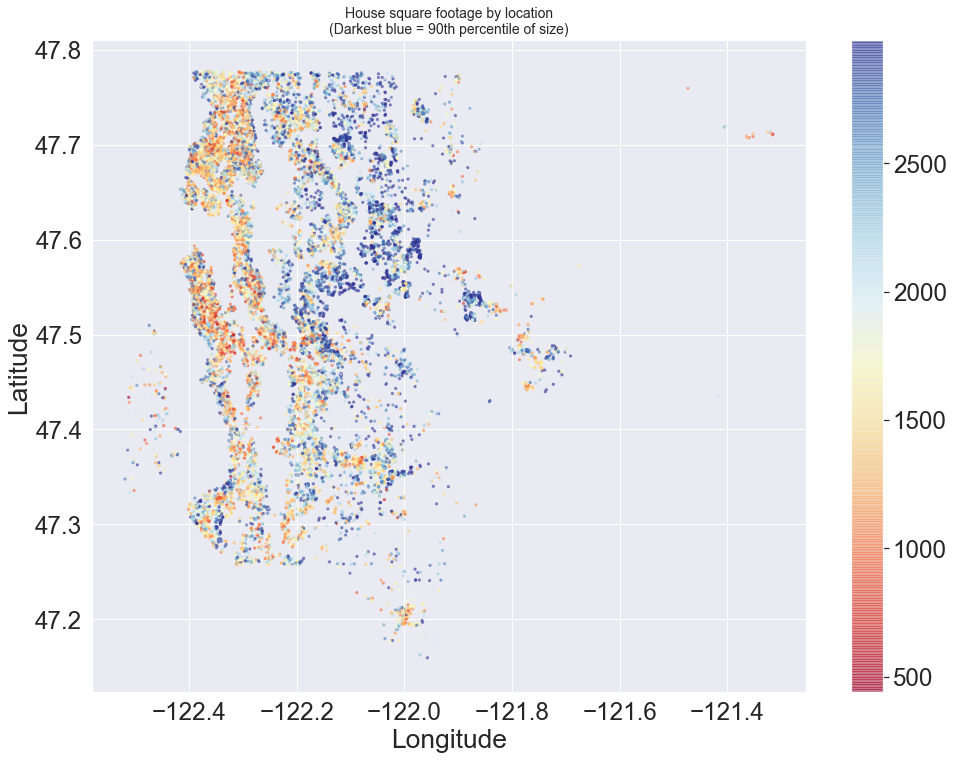

In [49]:
# Customize the plot for sqft_living by location
plt.figure(figsize=(16,12))
cmap = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(midrange_homes['long'], midrange_homes['lat'], 
                 c=midrange_homes['sqft_living'], 
                 vmin=min(midrange_homes['sqft_living']), 
                 vmax=np.percentile(midrange_homes['sqft_living'], 90), 
                 alpha=0.5, s=5, cmap=cmap)
plt.colorbar(sc)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('House square footage by location\n(Darkest blue = 90th percentile of size)', fontsize=14)
plt.show();

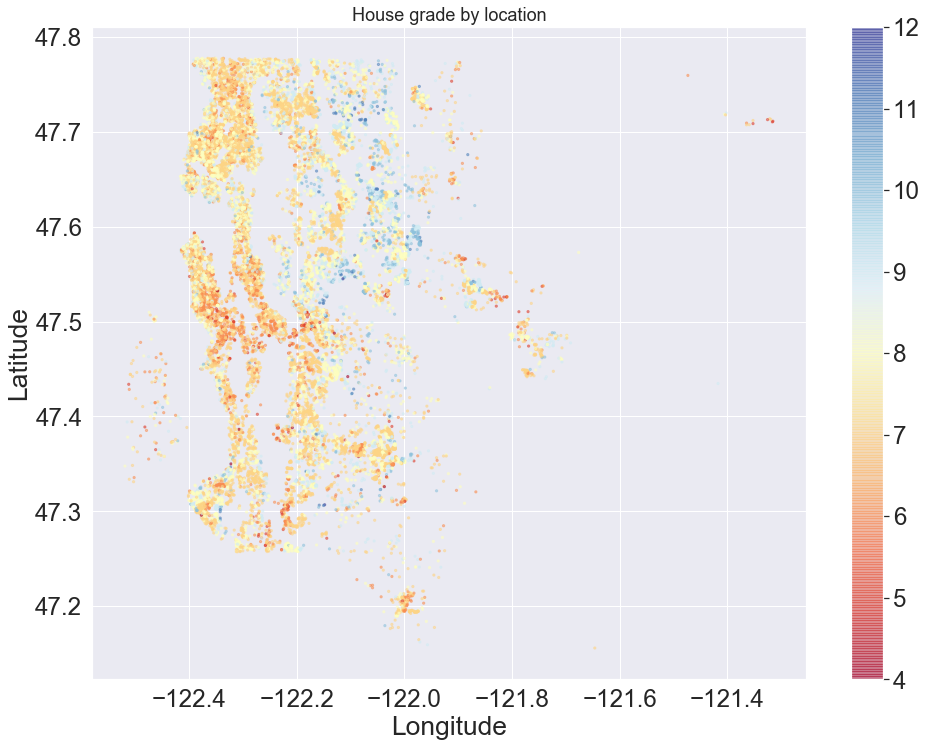

In [50]:
# Call locate_it for grade by location
locate_it(midrange_homes, 'lat', 'long', 'grade')

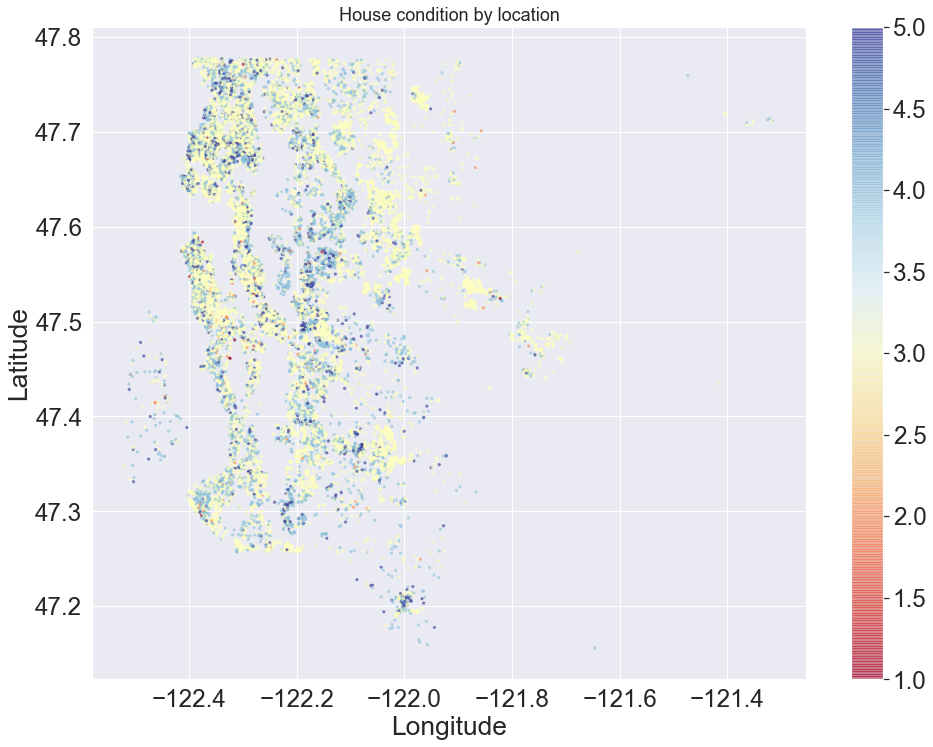

In [51]:
locate_it(midrange_homes, 'lat', 'long', 'condition')

In [52]:
list(features)

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'yr_built',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [53]:
target

'price'

In [54]:
feature_matrix = midrange_homes[features]
#feature_matrix = preprocessing.scale(feature_matrix)
feature_matrix_unscaled = midrange_homes[features]
lable_vector = midrange_homes['price']
feature_matrix_unscaled.head()
#feature_matrix[0::1000]

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  yr_built  zipcode      lat     long  sqft_living15  \
0          3      7      1955    98178  47.5112 -122.257           1340   
1          3      7      1951    98125  47.7210 -122.319           1690   
2          3      6      1933    98028  47.7379 -122.233           2720   
3          5      7      1965    98136  47.5208 -122.393           1360   
4          3      8      1987    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503

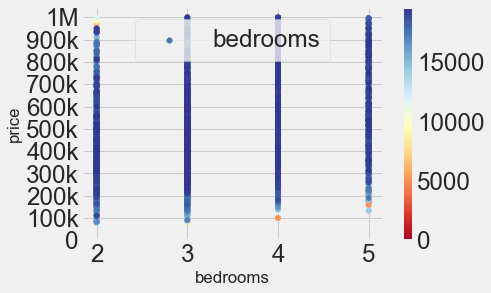

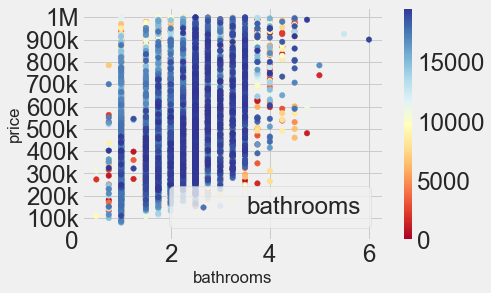

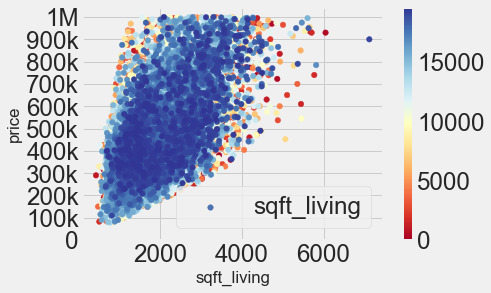

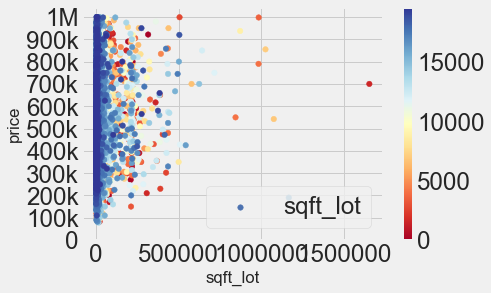

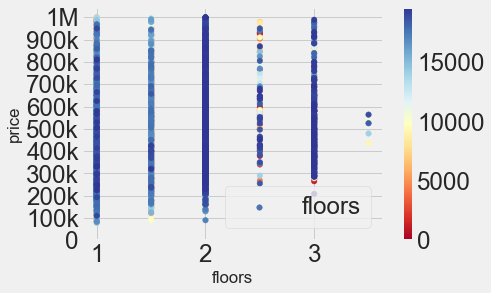

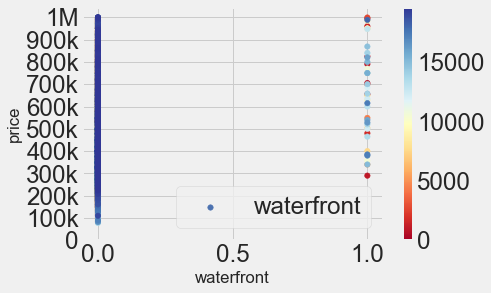

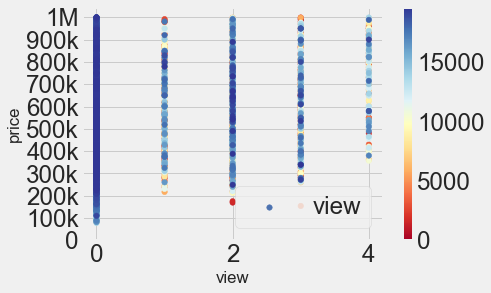

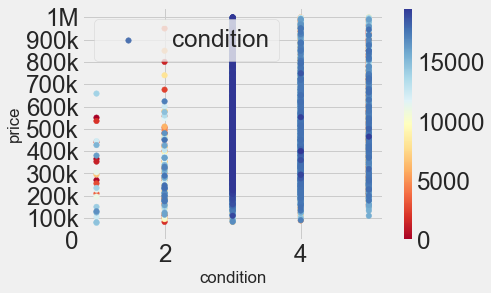

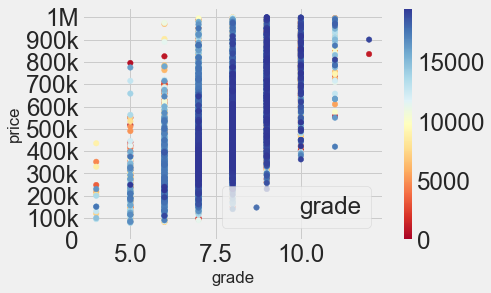

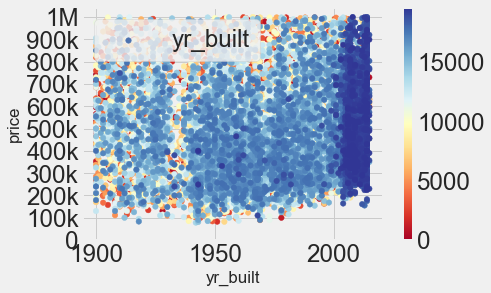

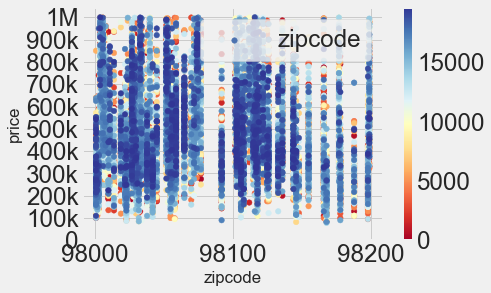

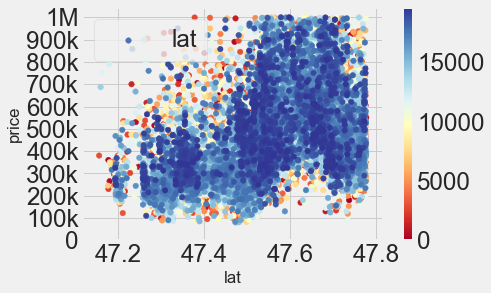

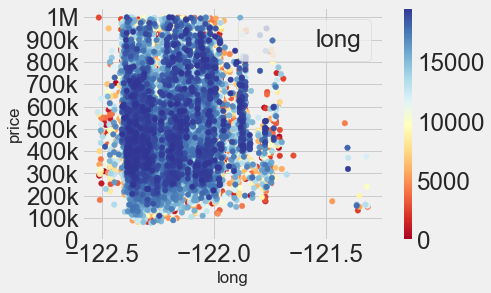

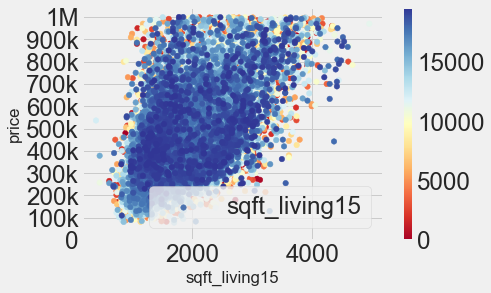

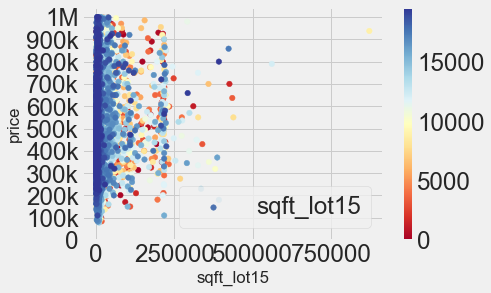

In [55]:
style.use('fivethirtyeight')
cm = plt.cm.get_cmap('RdYlBu')
xy = range(19648)
z = xy
for feature in feature_matrix_unscaled:
    sc = plt.scatter(midrange_homes[feature], midrange_homes['price'], label = feature, c = z, marker = 'o', s = 30, cmap = cm)
    plt.colorbar(sc)
    plt.xlabel(''+feature)
    plt.ylabel('price')
    plt.yticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000],
            ['0', '100k', '200k', '300k', '400k', '500k', '600k',  '700k', '800k', '900k', '1M'])
    plt.legend()
    plt.show()

# Final preprocessing

In [56]:
# Generate dummy variables
zip_dummies = pd.get_dummies(midrange_homes['zipcode'], prefix='zip')

In [57]:
# Drop the original 'zipcode' column
mh_no_zips = midrange_homes.drop('zipcode', axis=1)

# Concatenate the dummies to the copy of 'midrange_homes'
mh_zips_encoded = pd.concat([mh_no_zips, zip_dummies], axis=1)

# Preview the new DataFrame
mh_zips_encoded.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  zip_98146  zip_98148  zip_98155  zip_98166  \
0     0          3      7  ...          0          0          0          0   
1     0          3      7  ...          0          0          0          0   
2     0          3      6  ...          0          0          0          0   
3     0          5      7  ...          0          0          0          0   
4     0          3      8  ...          0          0          0          0   

   zip_98168  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0          0          0          1          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 85 columns]

In [58]:
# Drop one of the dummy variables
mh_zips_encoded.drop('zip_98168', axis=1, inplace=True)

# Check the head again
mh_zips_encoded.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  ...  zip_98144  zip_98146  zip_98148  zip_98155  \
0     0          3      7  ...          0          0          0          0   
1     0          3      7  ...          0          0          0          0   
2     0          3      6  ...          0          0          0          0   
3     0          5      7  ...          0          0          0          0   
4     0          3      8  ...          0          0          0          0   

   zip_98166  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0          0          0          1          0          0          0  
1          0          0          0          0          0          0  
2          0          0          0          0          0          0  
3          0          0          0          0          0          0  
4          0          0          0          0          0          0  

[5 rows x 84 columns]

# Creating the model

In [59]:
# Import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [60]:
# Split the cleaned data into features and target
mh_features = midrange_homes.drop(['price'], axis=1)
mh_target = midrange_homes['price']

In [61]:
# Define a function to run OLS and return model summary
def model_it(data, features):
    
    """Fit an OLS model and return model summary
    data: a DataFrame containing both features and target
    features: identical to 'data', but with the target dropped"""
    
    features_sum = '+'.join(features.columns)
    formula = 'price' + '~' + features_sum

    model = ols(formula=formula, data=data).fit()
    return model.summary()

In [62]:
# Fit the model and return summary
model_it(midrange_homes, mh_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     2929.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        19:06:19   Log-Likelihood:            -2.5565e+05
No. Observations:               19648   AIC:                         5.113e+05
Df Residuals:                   19632   BIC:                         5.115e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.547e+06   1.64e+06     -3.385      0.001   -8.76e+06   -2.33e+06
bedrooms      -1.092e+04   1266.310     -8.627      0.000   -1.34e+04   -8442.663
bathrooms      2.535e+04   1894.527     13.383      0.000    2.16e+04    2.91e+04
sqft_living      68.8575      2.147     32.070      0.000      64.649      73.066
sqft_lot          0.2347      0.027      8.574      0.000       0.181       0.288
floors         3.262e+04   1849.262     17.638      0.000     2.9e+04    3.62e+04
waterfront      1.46e+05   1.68e+04      8.670      0.000    1.13e+05    1.79e+05
view           2.766e+04   1373.269     20.145      0.000     2.5e+04    3.04e+04
condition      2.369e+04   1321.289     17.926      0.000    2.11e+04    2.63e+04
grade          7.053e+04   1271.648     55.465      0.000     6.8e+04     7.3e+04
yr_built      -1831.9798     40.762    -44.943      0.000   -1911.877   -1752.083
zipcode        -208.0499     18.661    -11.149      0.000    -244.628    -171.472
lat             5.33e+05   5884.046     90.590      0.000    5.22e+05    5.45e+05
long          -3.092e+04   7207.069     -4.290      0.000    -4.5e+04   -1.68e+04
sqft_living15    45.5594      2.120     21.486      0.000      41.403      49.716
sqft_lot15       -0.1291      0.042     -3.068      0.002      -0.212      -0.047
==============================================================================
Omnibus:                     1096.723   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1710.421
Skew:                           0.475   Prob(JB):                         0.00
Kurtosis:                       4.090   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Second model

In [63]:
# Drop unwanted features and rerun the modeling function
mh_features_fewer = mh_features.drop(['long', 'sqft_lot15'], axis=1)

model_it(midrange_homes, mh_features_fewer)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     3372.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        19:06:20   Log-Likelihood:            -2.5567e+05
No. Observations:               19648   AIC:                         5.114e+05
Df Residuals:                   19634   BIC:                         5.115e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.247e+06   1.63e+06     -3.212      0.001   -8.45e+06   -2.04e+06
bedrooms      -1.062e+04   1265.256     -8.392      0.000   -1.31e+04   -8137.495
bathrooms      2.596e+04   1892.706     13.715      0.000    2.22e+04    2.97e+04
sqft_living      67.8108      2.140     31.686      0.000      63.616      72.006
sqft_lot          0.1626      0.020      8.157      0.000       0.124       0.202
floors         3.298e+04   1849.184     17.837      0.000    2.94e+04    3.66e+04
waterfront     1.469e+05   1.68e+04      8.717      0.000    1.14e+05     1.8e+05
view           2.798e+04   1371.582     20.399      0.000    2.53e+04    3.07e+04
condition      2.371e+04   1321.963     17.937      0.000    2.11e+04    2.63e+04
grade          7.129e+04   1262.940     56.446      0.000    6.88e+04    7.38e+04
yr_built      -1875.9661     39.690    -47.266      0.000   -1953.761   -1798.171
zipcode        -171.2481     16.833    -10.173      0.000    -204.242    -138.254
lat             5.32e+05   5876.744     90.534      0.000    5.21e+05    5.44e+05
sqft_living15    43.6176      2.088     20.887      0.000      39.524      47.711
==============================================================================
Omnibus:                     1159.211   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1824.504
Skew:                           0.492   Prob(JB):                         0.00
Kurtosis:                       4.122   Cond. No.                     2.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Third model

In [64]:
# Split the data into features and target
mh_zips_encoded_features = mh_zips_encoded.drop(['price'], axis=1)
mh_zips_encoded_target = mh_zips_encoded['price']

In [65]:
model_it(mh_zips_encoded, mh_zips_encoded_features)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1144.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        19:06:20   Log-Likelihood:            -2.4984e+05
No. Observations:               19648   AIC:                         4.998e+05
Df Residuals:                   19564   BIC:                         5.005e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.079e+07   3.25e+06     -3.316      0.001   -1.72e+07   -4.41e+06
bedrooms      -2774.2737    958.142     -2.895      0.004   -4652.314    -896.233
bathrooms      1.098e+04   1430.332      7.677      0.000    8177.044    1.38e+04
sqft_living      89.6388      1.626     55.125      0.000      86.452      92.826
sqft_lot          0.2944      0.020     14.373      0.000       0.254       0.335
floors         3053.9858   1482.279      2.060      0.039     148.594    5959.378
waterfront     1.766e+05   1.29e+04     13.709      0.000    1.51e+05    2.02e+05
view           2.505e+04   1047.735     23.913      0.000     2.3e+04    2.71e+04
condition      1.949e+04   1009.493     19.306      0.000    1.75e+04    2.15e+04
grade          4.586e+04    994.031     46.140      0.000    4.39e+04    4.78e+04
yr_built       -641.2665     33.509    -19.137      0.000    -706.948    -575.585
lat            1.666e+05   3.33e+04      5.007      0.000    1.01e+05    2.32e+05
long           -3.11e+04   2.42e+04     -1.288      0.198   -7.84e+04    1.62e+04
sqft_living15    39.0359      1.664     23.465      0.000      35.775      42.297
sqft_lot15        0.0077      0.032      0.237      0.813      -0.056       0.071
zip_98001     -7909.5207   8932.194     -0.886      0.376   -2.54e+04    9598.342
zip_98002      3760.1398   9965.948      0.377      0.706   -1.58e+04    2.33e+04
zip_98003     -1.621e+04   9110.113     -1.780      0.075   -3.41e+04    1642.028
zip_98004      4.188e+05      1e+04     41.835      0.000    3.99e+05    4.38e+05
zip_98005      2.595e+05   1.01e+04     25.706      0.000     2.4e+05    2.79e+05
zip_98006      2.084e+05   8112.090     25.685      0.000    1.92e+05    2.24e+05
zip_98007       1.88e+05   1.06e+04     17.725      0.000    1.67e+05    2.09e+05
zip_98008      1.806e+05   9618.207     18.782      0.000    1.62e+05    1.99e+05
zip_98010      8.611e+04    1.3e+04      6.639      0.000    6.07e+04    1.12e+05
zip_98011      5.944e+04   1.22e+04      4.887      0.000    3.56e+04    8.33e+04
zip_98014      4.996e+04   1.58e+04      3.155      0.002    1.89e+04     8.1e+04
zip_98019      2.863e+04   1.45e+04      1.975      0.048     216.783     5.7e+04
zip_98022      1.985e+04   1.37e+04      1.452      0.147   -6949.811    4.66e+04
zip_98023     -3.578e+04   8850.088     -4.043      0.000   -5.31e+04   -1.84e+04
zip_98024       1.11e+05   1.48e+04      7.504      0.000     8.2e+04     1.4e+05
zip_98027      1.475e+05   9268.999     15.918      0.000    1.29e+05    1.66e+05
zip_98028      4.727e+04   1.14e+04      4.130      0.000    2.48e+04    6.97e+04
zip_98029      1.836e+05   1.05e+04     17.554      0.000    1.63e+05    2.04e+05
zip_98030      -1.01e+04   8616.681     -1.172      0.241    -2.7e+04    6792.312
zip_98031     -1.144e+04   8072.512     -1.417   

In [66]:
mh_zips_encoded_features.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  yr_built  ...  zip_98144  zip_98146  zip_98148  \
0          3      7      1955  ...          0          0          0   
1          3      7      1951  ...          0          0          0   
2          3      6      1933  ...          0          0          0   
3          5      7      1965  ...          0          0          0   
4          3      8      1987  ...          0          0          0   

   zip_98155  zip_98166  zip_98177  zip_98178  zip_98188  zip_98198  zip_98199  
0          0          0          0          1          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 83 columns]

In [67]:
final_data = mh_zips_encoded_features.drop(['long','sqft_lot15','zip_98001','zip_98002','zip_98003','zip_98019','zip_98022','zip_98030'], axis =1)

In [68]:
f_data =final_data.drop(['zip_98031','zip_98042','zip_98055','zip_98058','zip_98092','zip_98178','zip_98188','zip_98198'], axis = 1)

In [69]:
f_data.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   
2         2       1.00          770     10000     1.0           0     0   
3         4       3.00         1960      5000     1.0           0     0   
4         3       2.00         1680      8080     1.0           0     0   

   condition  grade  yr_built  ...  zip_98126  zip_98133  zip_98136  \
0          3      7      1955  ...          0          0          0   
1          3      7      1951  ...          0          0          0   
2          3      6      1933  ...          0          0          0   
3          5      7      1965  ...          0          0          1   
4          3      8      1987  ...          0          0          0   

   zip_98144  zip_98146  zip_98148  zip_98155  zip_98166  zip_98177  zip_98199  
0          0          0          0          0          0          0          0  
1          0          0          0          0          0          0          0  
2          0          0          0          0          0          0          0  
3          0          0          0          0          0          0          0  
4          0          0          0          0          0          0          0  

[5 rows x 67 columns]

In [70]:
X = f_data
y = mh_zips_encoded['price']
Xconst = sm.add_constant(X)
model = sm.OLS(y, Xconst, hasconst= True)
fitted_model = model.fit()
fitted_model.summary()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     1415.
Date:                Thu, 14 May 2020   Prob (F-statistic):               0.00
Time:                        19:06:21   Log-Likelihood:            -2.4986e+05
No. Observations:               19648   AIC:                         4.999e+05
Df Residuals:                   19580   BIC:                         5.004e+05
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.115e+06   5.42e+05    -16.814      0.000   -1.02e+07   -8.05e+06
bedrooms      -2862.0670    957.226     -2.990      0.003   -4738.312    -985.822
bathrooms      1.097e+04   1429.616      7.671      0.000    8165.057    1.38e+04
sqft_living      89.7299      1.623     55.274      0.000      86.548      92.912
sqft_lot          0.3061      0.016     19.672      0.000       0.276       0.337
floors         3308.6759   1478.517      2.238      0.025     410.657    6206.695
waterfront     1.761e+05   1.29e+04     13.687      0.000    1.51e+05    2.01e+05
view           2.555e+04   1037.240     24.631      0.000    2.35e+04    2.76e+04
condition      1.969e+04   1003.302     19.626      0.000    1.77e+04    2.17e+04
grade          4.566e+04    990.769     46.090      0.000    4.37e+04    4.76e+04
yr_built       -647.4724     33.162    -19.525      0.000    -712.472    -582.473
lat            2.117e+05   1.13e+04     18.766      0.000     1.9e+05    2.34e+05
sqft_living15    38.6431      1.652     23.395      0.000      35.406      41.881
zip_98004      4.103e+05   7589.237     54.069      0.000    3.95e+05    4.25e+05
zip_98005      2.504e+05   7397.909     33.848      0.000    2.36e+05    2.65e+05
zip_98006      2.009e+05   4841.541     41.487      0.000    1.91e+05     2.1e+05
zip_98007      1.778e+05   7754.340     22.935      0.000    1.63e+05    1.93e+05
zip_98008      1.693e+05   5789.758     29.246      0.000    1.58e+05    1.81e+05
zip_98010      8.364e+04   8266.784     10.118      0.000    6.74e+04    9.98e+04
zip_98011      4.474e+04   7249.993      6.171      0.000    3.05e+04     5.9e+04
zip_98014      2.729e+04   8388.841      3.253      0.001    1.08e+04    4.37e+04
zip_98023     -2.543e+04   3969.414     -6.407      0.000   -3.32e+04   -1.77e+04
zip_98024      9.531e+04   9830.106      9.696      0.000     7.6e+04    1.15e+05
zip_98027      1.384e+05   4591.974     30.136      0.000    1.29e+05    1.47e+05
zip_98028      3.382e+04   6449.016      5.244      0.000    2.12e+04    4.65e+04
zip_98029      1.717e+05   5190.460     33.078      0.000    1.62e+05    1.82e+05
zip_98032     -2.663e+04   7404.866     -3.597      0.000   -4.11e+04   -1.21e+04
zip_98033      2.243e+05   5634.131     39.805      0.000    2.13e+05    2.35e+05
zip_98034      9.302e+04   5281.305     17.614      0.000    8.27e+04    1.03e+05
zip_98038      2.863e+04   3623.174      7.901      0.000    2.15e+04    3.57e+04
zip_98039      5.591e+05   3.63e+04     15.415      0.000    4.88e+05     6.3e+05
zip_98040      3.429e+05   7251.645     47.288      0.000    3.29e+05    3.57e+05
zip_98045      7.421e+04   5756.106     12.892      0.000    6.29e+04    8.55e+04
zip_98052       1.72e+05   4942.352     34.806      0.000    1.62e+05    1.82e+05
zip_98053      1.654e+05   5519.624     29.962   

In [71]:
X = f_data
y = mh_zips_encoded['price']
# Xconst = sm.add_constant(X)
model = sm.OLS(y, X)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          1.106e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):                        0.00
Time:                        19:06:21   Log-Likelihood:                     -2.5000e+05
No. Observations:               19648   AIC:                                  5.001e+05
Df Residuals:                   19581   BIC:                                  5.007e+05
Df Model:                          67                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3279.8369    963.762     -3.403      0.001   -5168.893   -1390.781
bathrooms      1.216e+04   1438.088      8.456      0.000    9341.603     1.5e+04
sqft_living      89.7773      1.635     54.910      0.000      86.573      92.982
sqft_lot          0.2910      0.016     18.596      0.000       0.260       0.322
floors         4440.0645   1487.571      2.985      0.003    1524.298    7355.831
waterfront     1.787e+05    1.3e+04     13.793      0.000    1.53e+05    2.04e+05
view           2.466e+04   1043.306     23.633      0.000    2.26e+04    2.67e+04
condition      1.758e+04   1002.569     17.537      0.000    1.56e+04    1.95e+04
grade          4.565e+04    997.870     45.751      0.000    4.37e+04    4.76e+04
yr_built       -740.2784     32.933    -22.478      0.000    -804.831    -675.726
lat            2.335e+04   1340.030     17.422      0.000    2.07e+04     2.6e+04
sqft_living15    38.9064      1.664     23.388      0.000      35.646      42.167
zip_98004      4.504e+05   7257.869     62.053      0.000    4.36e+05    4.65e+05
zip_98005      2.903e+05   7057.944     41.127      0.000    2.76e+05    3.04e+05
zip_98006       2.32e+05   4504.231     51.518      0.000    2.23e+05    2.41e+05
zip_98007      2.181e+05   7428.668     29.357      0.000    2.04e+05    2.33e+05
zip_98008      2.107e+05   5279.562     39.901      0.000       2e+05    2.21e+05
zip_98010      7.301e+04   8301.642      8.795      0.000    5.67e+04    8.93e+04
zip_98011      1.122e+05   6081.533     18.451      0.000       1e+05    1.24e+05
zip_98014      8.052e+04   7824.185     10.291      0.000    6.52e+04    9.59e+04
zip_98023     -4.155e+04   3879.492    -10.711      0.000   -4.92e+04   -3.39e+04
zip_98024      1.257e+05   9731.748     12.917      0.000    1.07e+05    1.45e+05
zip_98027      1.625e+05   4392.771     37.001      0.000    1.54e+05    1.71e+05
zip_98028      1.014e+05   5079.209     19.964      0.000    9.14e+04    1.11e+05
zip_98029      2.027e+05   4887.314     41.467      0.000    1.93e+05    2.12e+05
zip_98032     -3.067e+04   7454.027     -4.114      0.000   -4.53e+04   -1.61e+04
zip_98033      2.783e+05   4661.493     59.698      0.000    2.69e+05    2.87e+05
zip_98034      1.544e+05   3843.267     40.178      0.000    1.47e+05    1.62e+05
zip_98038      2.459e+04   3641.117      6.754      0.000    1.75e+04    3.17e+04
zip_98039      6.037e+05   3.64e+04     16.568      0.000    5.32e+05    6.75e+05
zip_98040       3.74e+05   7061.637     52.968      0.000     3.6e+05    3.88e+05
zip_98045      8.966e+04   5723.001     15.666      0.000    7.84e+04    1.01e+05
zip_98052      2.258e+05   3793.599     59.528      0.000    2.18e+05    2.33e+05
zip_98053      2.198e+05   4501.


Conclusion

So, we have seen that accuracy of OLS is around 82.9%. 